In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline


In [2]:
import re

In [3]:
import gensim


paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [4]:
import os

In [5]:
os.chdir("/Users/abhishekvigg/Desktop/Sentiment Analysis")
os.getcwd()

'/Users/abhishekvigg/Desktop/Sentiment Analysis'

In [6]:
#Reading in the data
df = pd.read_csv('sentiment.tsv', sep='\t',header = None)

In [7]:
#Checking the first ten entries
df.head(10)

,0,1
0,neg,"@jamielewislewis i cant believe it, it really doesnt belong there! i hope it doesnt ruin it im not too bad thanks!hows life treatin you?x"
1,pos,"having a vodka tonic and looking forward to going to Saddle Ranch at the Westgate with the husband, sans kiddos"
2,pos,@ddlovatofans1neg1 Could you follow me please.I would really appreciate it.
3,pos,@jordanknight for once.................. PLEASE TELL US WHY u were thinking of this person?!?
4,neg,Had a dream about a walk in fast food resturaunt that sold ice cream and guitar strings.They were sold out of 12gauge
5,pos,@TroyBrownBBNews Yes... For a &quot;friend&quot;
6,pos,Packing for work expierance
7,neg,hates @internet @explrer (angry)(angry) **but no choice** http://plurk.com/p/rqqi5
8,neg,@federalcase I said I go out for eat 5:negneg p.m. I disappointed you.
9,neg,@babykates7 yeah they won't do the surgery till the cold is gone...poor thing still has runny eyes


In [8]:
df.tail(10)

,0,1
1991,pos,@tinhet Hey you It surprisingly didn't hurt that much..as for your foot...I don't know
1992,pos,@childrensjewell @Bazzaa Thank you I will post the winning recipe on my website soon
1993,pos,Just smashed this Tommy's for my 2PM breakfast
1994,pos,@ionacosmetics spent yesterday outside myself--got a bit of a sunburn gonna go back to bed soon
1995,neg,"@PrimalMan You're so lucky! I used to have access to wild yabbies (shrimp?), but never fish or game (roos were protected). Now nuffin'"
1996,neg,STILL @ panera...studying for &quot;mock&quot; board exams tomorrow!! So tired.
1997,neg,Insomnia is out of control tonight--haven't slept a wink.
1998,pos,@Covergirlneg8 I take pride in what I do
1999,pos,heading to work on the 6
2000,pos,@queith asi es!


In [9]:
#Giving the header a name
df.columns = ["Sentiment","Text"]

In [10]:
df.head()

,Sentiment,Text
0,neg,"@jamielewislewis i cant believe it, it really doesnt belong there! i hope it doesnt ruin it im not too bad thanks!hows life treatin you?x"
1,pos,"having a vodka tonic and looking forward to going to Saddle Ranch at the Westgate with the husband, sans kiddos"
2,pos,@ddlovatofans1neg1 Could you follow me please.I would really appreciate it.
3,pos,@jordanknight for once.................. PLEASE TELL US WHY u were thinking of this person?!?
4,neg,Had a dream about a walk in fast food resturaunt that sold ice cream and guitar strings.They were sold out of 12gauge


In [11]:
#Let's check label distribution
df["Sentiment"].value_counts()

pos    1016
neg     985
Name: Sentiment, dtype: int64

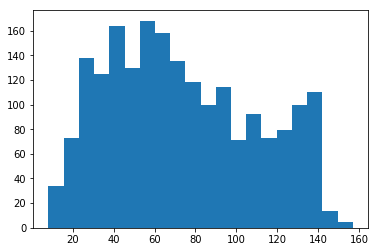

In [12]:
#Looks like a balanced dataset
#Checking the distribution of length of tweets
length_tweet = df['Text'].str.len() 
plt.hist(length_tweet, bins=20) 
plt.show()

In [13]:
#Data Cleaning
#Writing user defined function to remove unwanted text patterns
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt  

In [14]:
#We start the data cleaning by removing all the twitter handles that start with @ and store in df["tidy_tweet"]
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['Text'], "@[\w]*") 
df.head()

,Sentiment,Text,tidy_tweet
0,neg,"@jamielewislewis i cant believe it, it really doesnt belong there! i hope it doesnt ruin it im not too bad thanks!hows life treatin you?x","i cant believe it, it really doesnt belong there! i hope it doesnt ruin it im not too bad thanks!hows life treatin you?x"
1,pos,"having a vodka tonic and looking forward to going to Saddle Ranch at the Westgate with the husband, sans kiddos","having a vodka tonic and looking forward to going to Saddle Ranch at the Westgate with the husband, sans kiddos"
2,pos,@ddlovatofans1neg1 Could you follow me please.I would really appreciate it.,Could you follow me please.I would really appreciate it.
3,pos,@jordanknight for once.................. PLEASE TELL US WHY u were thinking of this person?!?,for once.................. PLEASE TELL US WHY u were thinking of this person?!?
4,neg,Had a dream about a walk in fast food resturaunt that sold ice cream and guitar strings.They were sold out of 12gauge,Had a dream about a walk in fast food resturaunt that sold ice cream and guitar strings.They were sold out of 12gauge


In [15]:
#Now we remove punctuations,numbers and special characters
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
df.head(10)

,Sentiment,Text,tidy_tweet
0,neg,"@jamielewislewis i cant believe it, it really doesnt belong there! i hope it doesnt ruin it im not too bad thanks!hows life treatin you?x",i cant believe it it really doesnt belong there i hope it doesnt ruin it im not too bad thanks hows life treatin you x
1,pos,"having a vodka tonic and looking forward to going to Saddle Ranch at the Westgate with the husband, sans kiddos",having a vodka tonic and looking forward to going to Saddle Ranch at the Westgate with the husband sans kiddos
2,pos,@ddlovatofans1neg1 Could you follow me please.I would really appreciate it.,Could you follow me please I would really appreciate it
3,pos,@jordanknight for once.................. PLEASE TELL US WHY u were thinking of this person?!?,for once PLEASE TELL US WHY u were thinking of this person
4,neg,Had a dream about a walk in fast food resturaunt that sold ice cream and guitar strings.They were sold out of 12gauge,Had a dream about a walk in fast food resturaunt that sold ice cream and guitar strings They were sold out of gauge
5,pos,@TroyBrownBBNews Yes... For a &quot;friend&quot;,Yes For a quot friend quot
6,pos,Packing for work expierance,Packing for work expierance
7,neg,hates @internet @explrer (angry)(angry) **but no choice** http://plurk.com/p/rqqi5,hates angry angry but no choice http plurk com p rqqi
8,neg,@federalcase I said I go out for eat 5:negneg p.m. I disappointed you.,I said I go out for eat negneg p m I disappointed you
9,neg,@babykates7 yeah they won't do the surgery till the cold is gone...poor thing still has runny eyes,yeah they won t do the surgery till the cold is gone poor thing still has runny eyes


In [16]:
#I have decided to remove all the words with length less than 3 such as "hmm","lol",etc
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [17]:
df.head(10)

,Sentiment,Text,tidy_tweet
0,neg,"@jamielewislewis i cant believe it, it really doesnt belong there! i hope it doesnt ruin it im not too bad thanks!hows life treatin you?x",cant believe really doesnt belong there hope doesnt ruin thanks hows life treatin
1,pos,"having a vodka tonic and looking forward to going to Saddle Ranch at the Westgate with the husband, sans kiddos",having vodka tonic looking forward going Saddle Ranch Westgate with husband sans kiddos
2,pos,@ddlovatofans1neg1 Could you follow me please.I would really appreciate it.,Could follow please would really appreciate
3,pos,@jordanknight for once.................. PLEASE TELL US WHY u were thinking of this person?!?,once PLEASE TELL were thinking this person
4,neg,Had a dream about a walk in fast food resturaunt that sold ice cream and guitar strings.They were sold out of 12gauge,dream about walk fast food resturaunt that sold cream guitar strings They were sold gauge
5,pos,@TroyBrownBBNews Yes... For a &quot;friend&quot;,quot friend quot
6,pos,Packing for work expierance,Packing work expierance
7,neg,hates @internet @explrer (angry)(angry) **but no choice** http://plurk.com/p/rqqi5,hates angry angry choice http plurk rqqi
8,neg,@federalcase I said I go out for eat 5:negneg p.m. I disappointed you.,said negneg disappointed
9,neg,@babykates7 yeah they won't do the surgery till the cold is gone...poor thing still has runny eyes,yeah they surgery till cold gone poor thing still runny eyes


In [18]:
#Changing the target variable into 1 and 0
df["Sentiment"] = df["Sentiment"].replace("neg",0)

In [19]:
df["Sentiment"] = df["Sentiment"].replace("pos",1)

In [20]:
df.head()

,Sentiment,Text,tidy_tweet
0,0,"@jamielewislewis i cant believe it, it really doesnt belong there! i hope it doesnt ruin it im not too bad thanks!hows life treatin you?x",cant believe really doesnt belong there hope doesnt ruin thanks hows life treatin
1,1,"having a vodka tonic and looking forward to going to Saddle Ranch at the Westgate with the husband, sans kiddos",having vodka tonic looking forward going Saddle Ranch Westgate with husband sans kiddos
2,1,@ddlovatofans1neg1 Could you follow me please.I would really appreciate it.,Could follow please would really appreciate
3,1,@jordanknight for once.................. PLEASE TELL US WHY u were thinking of this person?!?,once PLEASE TELL were thinking this person
4,0,Had a dream about a walk in fast food resturaunt that sold ice cream and guitar strings.They were sold out of 12gauge,dream about walk fast food resturaunt that sold cream guitar strings They were sold gauge


In [21]:
#Text Normalization
#Before performing text normalization, we have to perform tokenization on the twitter text data
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0              [cant, believe, really, doesnt, belong, there, hope, doesnt, ruin, thanks, hows, life, treatin]
1        [having, vodka, tonic, looking, forward, going, Saddle, Ranch, Westgate, with, husband, sans, kiddos]
2                                                           [Could, follow, please, would, really, appreciate]
3                                                           [once, PLEASE, TELL, were, thinking, this, person]
4    [dream, about, walk, fast, food, resturaunt, that, sold, cream, guitar, strings, They, were, sold, gauge]
Name: tidy_tweet, dtype: object

In [22]:
#Now these tokenized tweets can be normalized
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [23]:
#Tweets have been reduced to their basic form
tokenized_tweet.head()

0               [cant, believ, realli, doesnt, belong, there, hope, doesnt, ruin, thank, how, life, treatin]
1                  [have, vodka, tonic, look, forward, go, saddl, ranch, westgat, with, husband, san, kiddo]
2                                                             [could, follow, pleas, would, realli, appreci]
3                                                               [onc, pleas, tell, were, think, thi, person]
4    [dream, about, walk, fast, food, resturaunt, that, sold, cream, guitar, string, they, were, sold, gaug]
Name: tidy_tweet, dtype: object

In [24]:
#Stitching back the tokens to form text
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
df['tidy_tweet'] = tokenized_tweet

In [25]:
df.head()

,Sentiment,Text,tidy_tweet
0,0,"@jamielewislewis i cant believe it, it really doesnt belong there! i hope it doesnt ruin it im not too bad thanks!hows life treatin you?x",cant believ realli doesnt belong there hope doesnt ruin thank how life treatin
1,1,"having a vodka tonic and looking forward to going to Saddle Ranch at the Westgate with the husband, sans kiddos",have vodka tonic look forward go saddl ranch westgat with husband san kiddo
2,1,@ddlovatofans1neg1 Could you follow me please.I would really appreciate it.,could follow pleas would realli appreci
3,1,@jordanknight for once.................. PLEASE TELL US WHY u were thinking of this person?!?,onc pleas tell were think thi person
4,0,Had a dream about a walk in fast food resturaunt that sold ice cream and guitar strings.They were sold out of 12gauge,dream about walk fast food resturaunt that sold cream guitar string they were sold gaug


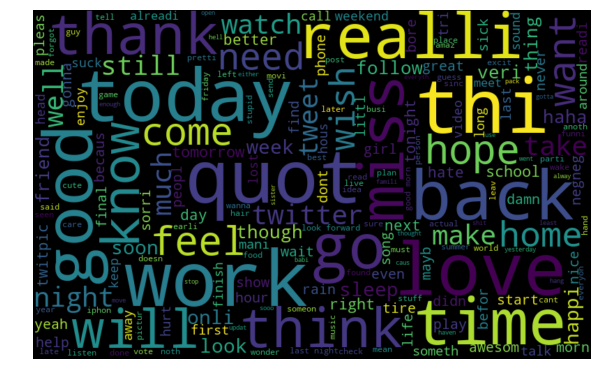

In [26]:
#using a word cloud to visualize the most common words in the dataset
all_words = ' '.join([text for text in df['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()



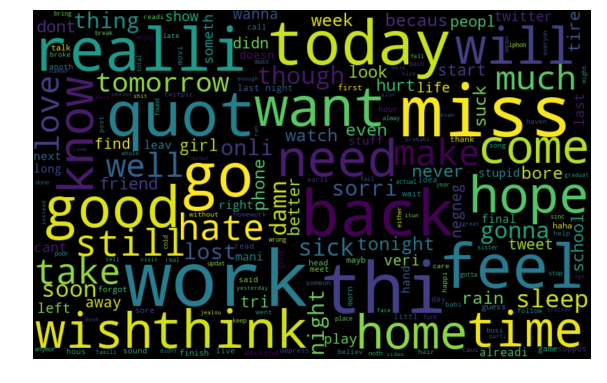

In [27]:
#Finding the most common words in the negative tweets
normal_words =' '.join([text for text in df['tidy_tweet'][df['Sentiment'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

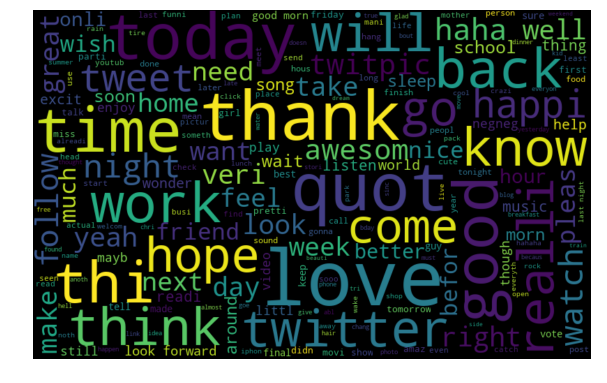

In [28]:
#Doing the same for positive sentiments
normal_words =' '.join([text for text in df['tidy_tweet'][df['Sentiment'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [29]:
#Studying the hashtags of the twitter data
#function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
        return hashtags



In [30]:
#Storing the hashtags related to negative and positive sentiments separately
HT_regular = hashtag_extract(df['tidy_tweet'][df['Sentiment'] == 0]) 

In [31]:
#Doing the same for positive tweets
HT_negative = hashtag_extract(df['tidy_tweet'][df['Sentiment'] == 1]) 

In [32]:
#unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

In [33]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [35]:
import random
random.seed(123)

In [36]:
#bag of words features
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(df['tidy_tweet']) 
bow.shape

(2001, 1000)

In [37]:
#TF-IDF Features
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(df['tidy_tweet']) 
tfidf.shape

(2001, 1000)

In [38]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [39]:
train = df.iloc[:1500,:]
test = df.iloc[1501:,:]

In [40]:
# Extracting train and test BoW features 
train_bow = bow[:1500,:] 
test_bow = bow[1501:,:] 

In [41]:
#Fitting a logistic regression model to Bag of words features
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['Sentiment'],random_state=42,test_size=0.25)


In [42]:
lreg = LogisticRegression() 

In [43]:
lreg.fit(xtrain_bow, ytrain) 

/Users/abhishekvigg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
prediction_prob = lreg.predict_proba(xvalid_bow)

In [45]:
prediction_prob_pos = prediction_prob[:,1]

In [46]:
from sklearn.metrics import roc_auc_score

In [47]:
roc_auc_score(yvalid,prediction_prob_pos)

0.731362394718871

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
#Fitting a random forest model to Bag of words features
rf = RandomForestClassifier(n_estimators=200, random_state=11).fit(xtrain_bow, ytrain) 


In [50]:
prediction = rf.predict_proba(xvalid_bow)

In [51]:
prediction = prediction[:,1]

In [52]:
roc_auc_score(yvalid,prediction)

0.7126109720009106

In [53]:
from xgboost import XGBClassifier

In [54]:
#Fittig a logistic regression model to TF-IDF Features
train_tfidf = tfidf[:1500,:] 
test_tfidf = tfidf[1501:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]

In [55]:
lreg.fit(xtrain_tfidf, ytrain) 

/Users/abhishekvigg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
prediction_log = lreg.predict_proba(xvalid_tfidf)

In [57]:
prediction_log = prediction_log[:,1]

In [58]:
roc_auc_score(yvalid,prediction_log)

0.7411080127475529

In [59]:
#Trying a XGB classifier
xgb = XGBClassifier(max_depth=6, n_estimators=500).fit(xtrain_tfidf, ytrain) 

In [60]:
prediction = xgb.predict_proba(xvalid_tfidf)

In [61]:
prediction = prediction[:,1]

In [62]:
roc_auc_score(yvalid,prediction)

0.6660454131572957

In [63]:
#SVM with bag of words
from sklearn import svm

In [64]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 

In [65]:
#AUC on Validation
roc_auc_score(yvalid,prediction_log)

0.7411080127475529

In [66]:
#Fitting the model on train set of bow features
test_pred = svc.predict_proba(test_bow) 

In [67]:
test_pred = test_pred[:,1]

In [68]:
#AUC on test set
roc_auc_score(test["Sentiment"],test_pred)

0.6689763325918932

In [69]:
#Trying word2vec from gensim

In [70]:
#tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 

In [ ]:
#wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
#for i in range(len(tokenized_tweet)):
   # wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
   # wordvec_df = pd.DataFrame(wordvec_arrays) 
      

In [ ]:
# wordvec_df.shape 

In [ ]:
##test_w2v = wordvec_df.iloc[1501:,:] 
#xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
#xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [ ]:
#lreg.fit(xtrain_w2v, ytrain) 
#prediction = lreg.predict_proba(xvalid_w2v) 

In [ ]:
#prediction = prediction[:,1]

In [ ]:
#r#oc_auc_score(yvalid,prediction)

In [ ]:
#svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
#prediction = svc.predict_proba(xvalid_w2v) 

In [ ]:
#prediction = prediction[:,1]

In [ ]:
#roc_auc_score(yvalid,prediction)